In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from geopy.geocoders import Nominatim
!pip install polars==0.18.4
!pip install summarytools
!pip install skimpy

  Using cached polars-0.18.4-cp37-abi3-win_amd64.whl.metadata (14 kB)
Using cached polars-0.18.4-cp37-abi3-win_amd64.whl (19.6 MB)
  Attempting uninstall: polars
    Found existing installation: polars 0.20.13
    Uninstalling polars-0.20.13:
      Successfully uninstalled polars-0.20.13


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
skimpy 0.0.14 requires polars<0.21,>=0.19, but you have polars 0.18.4 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached polars-0.20.13-cp38-abi3-win_amd64.whl.metadata (15 kB)
Using cached polars-0.20.13-cp38-abi3-win_amd64.whl (25.5 MB)
  Attempting uninstall: polars
    Found existing installation: polars 0.18.4
    Uninstalling polars-0.18.4:
      Successfully uninstalled polars-0.18.4



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Working with Application Data

In [2]:
appn_data = pd.read_csv("application_data.csv")
appn_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
import polars as pl
import pandas as pd
import seaborn as sns
from summarytools import dfSummary
from skimpy import skim

In [4]:
appn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
appn_dtls = pl.from_pandas(appn_data)

In [6]:
dfSummary(appn_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,SK_ID_CURR[int64],Mean (sd) : 278180.5 (102790.2)min < med < max:100002.0 < 278202.0 < 456255.0IQR (CV) : 177997.0 (2.7),"307,511 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACK0lEQVR4nO3Yu47aUBRG4X0Mgw4X2eIS6GhSRkphiYYHSJmHzSsgUaSmSJOKDsmyjHAGYRGnmSbNDL4MzC+tr2ZztsU6SODKsjTgowsevQBwi+6jF0C7nHN9M+vVHL+UZfnc5j5teTPUhg8emNnfmrNN51XPbjLrJ5PJtyiKhnWGj8dj6pz7UTfW97wkr4bqnOtPp9PvYRiOq556vV6f8jz/PBqNfgdBUNxzXvXspnsXReHN7Mtqtfo5m82OVWazLPObzWaeJMnMOVdp9sW7XpK3vlF7YRiO1+v1cxRF5yoH7/f78W63+xTH8a/FYpFWmW06r3p2S3sPvPfFfD7/U2U2z/Onoii+LpfLTqfTqfRZmzW/JNvtdpwkSc/MaoVqZmZRFJ2rPniapn0zs+FwWHm26bzq2W3tXcflcul67wdxHJ/vfUlevLo7P6bwn0dcklvw9xQkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokdG95UZZlvuobn04nb2aW57k/HA6De86rnq26d9P5W/r6ByCxP3C55mxvAAAAAElFTkSuQmCC"">",0(0.0%)
2,TARGET[int64],Mean (sd) : 0.1 (0.3)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 0.0 (0.3),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtUlEQVR4nO3XTYqDQBCG4apBRDfdiOBhPEQOm0N4GwntIkog6dnNZpj8dDJkvuF9tlpFL15s9JyzAX/dx7sPANyjuvWCu7dmVhfuP+Wc18JZ4MvVUN297ft+F0LoSpYvy3Jw9z2x4lm3vqh1CKEbx3GNMW6PLE4pNdM0dfM812ZGqHjKzavfzCzGuA3DcCzY3xbMAN/wMwUJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJ1bsPgP/D3VszqwvHTznn9aeHhIqXcPe27/tdCKErmV+W5eDu+59iJVS8Sh1C6MZxXGOM2yODKaVmmqZunufazAgVvy/GuA3DcCwYba895GcKEggVEu66+lNKzaOLU0rN+XyuzCy4+8MHg5xwuVyq0lZuvfMJdyVOfRsPMKsAAAAASUVORK5CYII="">",0(0.0%)
3,NAME_CONTRACT_TYPE[object],1. Cash loans2. Revolving loans,"278,232 (90.5%)29,279 (9.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bQWrDMBRF0a9iQjKRMAYvxovIYrsI7cYYa9CETNRB5yGW3JfWumdu+IOLIcHP5ZwNUHBmdjGz07sPwb/xyDnfSh7shmG4eu/7vS/CMaWUFufcZ0lwnfe+n6bpFkK4/8ZxOI51Xc8xxn6e55OZbY/NzCyEcB/H8Wv363BEl9IHP/a8AniG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGmc7s56O4dx+Cv6+2ky6ltMQYe6v4KA7tSCktZvYoeZbBC7YqHrw4pnxQqX2zFVeO9lRN+WpmXWhP8ZSvdtaF9tRO+fgFi5fxpy5kiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCme8jH/w1ZVU76aWRfaw+AFMt8KW2rfOfaTaQAAAABJRU5ErkJggg=="">",0(0.0%)
4,CODE_GENDER[object],1. F2. M3. XNA,"202,448 (65.8%)105,059 (34.2%)4 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmUlEQVR4nO3bQW6CUBSF4fMIsXUCISQsod0Di+hiuwgW0T0QwhtU64QOHBjTKT3P3v7fCq7xjwbjSdu2CXCoSh+A/yNJOko6lD4EP1y2bTuVPmJPdd/3b03TdKUPwb2c85JSeo8UXN00TTeO46lt23PpY3C1ruvzNE3dPM8HSXFik6S2bc/DMHyWPgZ3jqUP2BsPCLAhNtgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGG2KDTS1d/z9V+hDcRH0/6pzzMk1Tp4D/n/rLcs6LpEvpO/bEBuFxhdsgJKZ8cIn6yRbuUyGCkOuqiMukCMKtq6IukyKIuq7iyfoB8aMubIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAYbYoMNscGG2GATbl0V6bVEE3JdFXGZFAEbBNiwroINDwiwITbYVCml15QST3D4dZWkF0lPpQ9BfHyNwobYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAYbYoNNJelD0lfpQxAf6yrY8DUKm2/nRXM6yWPU4wAAAABJRU5ErkJggg=="">",0(0.0%)
5,FLAG_OWN_CAR[object],1. N2. Y,"202,924 (66.0%)104,587 (34.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCg

In [7]:
appn_data1 = appn_data.copy()

In [8]:
appn_data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
appn_data2 = appn_data1[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE']]

In [10]:
pd.set_option('display.max_columns', None)
appn_data2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,2.0,1,1,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,1.0,2,2,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,1.0,2,2,0,0,0,0,1,1,Religion


In [11]:
appn_dtls1 = pl.from_pandas(appn_data2)
dfSummary(appn_data2)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,SK_ID_CURR[int64],Mean (sd) : 278180.5 (102790.2)min < med < max:100002.0 < 278202.0 < 456255.0IQR (CV) : 177997.0 (2.7),"307,511 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACK0lEQVR4nO3Yu47aUBRG4X0Mgw4X2eIS6GhSRkphiYYHSJmHzSsgUaSmSJOKDsmyjHAGYRGnmSbNDL4MzC+tr2ZztsU6SODKsjTgowsevQBwi+6jF0C7nHN9M+vVHL+UZfnc5j5teTPUhg8emNnfmrNN51XPbjLrJ5PJtyiKhnWGj8dj6pz7UTfW97wkr4bqnOtPp9PvYRiOq556vV6f8jz/PBqNfgdBUNxzXvXspnsXReHN7Mtqtfo5m82OVWazLPObzWaeJMnMOVdp9sW7XpK3vlF7YRiO1+v1cxRF5yoH7/f78W63+xTH8a/FYpFWmW06r3p2S3sPvPfFfD7/U2U2z/Onoii+LpfLTqfTqfRZmzW/JNvtdpwkSc/MaoVqZmZRFJ2rPniapn0zs+FwWHm26bzq2W3tXcflcul67wdxHJ/vfUlevLo7P6bwn0dcklvw9xQkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokdG95UZZlvuobn04nb2aW57k/HA6De86rnq26d9P5W/r6ByCxP3C55mxvAAAAAElFTkSuQmCC"">",0(0.0%)
2,TARGET[int64],Mean (sd) : 0.1 (0.3)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 0.0 (0.3),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtUlEQVR4nO3XTYqDQBCG4apBRDfdiOBhPEQOm0N4GwntIkog6dnNZpj8dDJkvuF9tlpFL15s9JyzAX/dx7sPANyjuvWCu7dmVhfuP+Wc18JZ4MvVUN297ft+F0LoSpYvy3Jw9z2x4lm3vqh1CKEbx3GNMW6PLE4pNdM0dfM812ZGqHjKzavfzCzGuA3DcCzY3xbMAN/wMwUJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJ1bsPgP/D3VszqwvHTznn9aeHhIqXcPe27/tdCKErmV+W5eDu+59iJVS8Sh1C6MZxXGOM2yODKaVmmqZunufazAgVvy/GuA3DcCwYba895GcKEggVEu66+lNKzaOLU0rN+XyuzCy4+8MHg5xwuVyq0lZuvfMJdyVOfRsPMKsAAAAASUVORK5CYII="">",0(0.0%)
3,NAME_CONTRACT_TYPE[object],1. Cash loans2. Revolving loans,"278,232 (90.5%)29,279 (9.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bQWrDMBRF0a9iQjKRMAYvxovIYrsI7cYYa9CETNRB5yGW3JfWumdu+IOLIcHP5ZwNUHBmdjGz07sPwb/xyDnfSh7shmG4eu/7vS/CMaWUFufcZ0lwnfe+n6bpFkK4/8ZxOI51Xc8xxn6e55OZbY/NzCyEcB/H8Wv363BEl9IHP/a8AniG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGmc7s56O4dx+Cv6+2ky6ltMQYe6v4KA7tSCktZvYoeZbBC7YqHrw4pnxQqX2zFVeO9lRN+WpmXWhP8ZSvdtaF9tRO+fgFi5fxpy5kiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCme8jH/w1ZVU76aWRfaw+AFMt8KW2rfOfaTaQAAAABJRU5ErkJggg=="">",0(0.0%)
4,CODE_GENDER[object],1. F2. M3. XNA,"202,448 (65.8%)105,059 (34.2%)4 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmUlEQVR4nO3bQW6CUBSF4fMIsXUCISQsod0Di+hiuwgW0T0QwhtU64QOHBjTKT3P3v7fCq7xjwbjSdu2CXCoSh+A/yNJOko6lD4EP1y2bTuVPmJPdd/3b03TdKUPwb2c85JSeo8UXN00TTeO46lt23PpY3C1ruvzNE3dPM8HSXFik6S2bc/DMHyWPgZ3jqUP2BsPCLAhNtgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGG2KDTS1d/z9V+hDcRH0/6pzzMk1Tp4D/n/rLcs6LpEvpO/bEBuFxhdsgJKZ8cIn6yRbuUyGCkOuqiMukCMKtq6IukyKIuq7iyfoB8aMubIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAYbYoMNscGG2GATbl0V6bVEE3JdFXGZFAEbBNiwroINDwiwITbYVCml15QST3D4dZWkF0lPpQ9BfHyNwobYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAYbYoNNJelD0lfpQxAf6yrY8DUKm2/nRXM6yWPU4wAAAABJRU5ErkJggg=="">",0(0.0%)
5,FLAG_OWN_CAR[object],1. N2. Y,"202,924 (66.0%)104,587 (34.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCg

In [12]:
appn_final = appn_data2.copy()

# Working with Previous data

In [13]:
pr_appln = pd.read_csv("previous_application.csv")

In [14]:
pr_appln.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
pr_appn_dtls = pl.from_pandas(pr_appln)
dfSummary(pr_appln)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,SK_ID_PREV[int64],Mean (sd) : 1923089.1 (532598.0)min < med < max:1000001.0 < 1923110.5 < 2845382.0IQR (CV) : 922422.5 (3.6),"1,670,214 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB9ElEQVR4nO3XvU7CYBSH8fM2SF4+0jd8CBfg6EbCwgU4erFeBIMzg4sTGwlpSqgQG6yLK0gpUv/J81vL6TkkzwCuKAoD/ruo7gOAczT+8uXOuZaZNSu8IjKzrxpm69ytenfV+c+iKHbHHv4aaoXYfL/ffwohdC6YtcPhcJdl2UO3232Poii/1Wydu1Xvvsb8ZrNJnHMvx2I9GapzrjUYDJ7jOO6VXZznuTezx+l0+jocDjdl55fLZW+xWNxPJpO38Xic3Gq2zt2qd1edT9PUz+fz3nq9bppZ+VDNrBnHcW82m+1CCPsyy38Ob3vv89Fo9FFm1swsSZKWmVmn09mXna8yW+du1buvMW9mrVMPz/qNGkK4+IsD18C/fkggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEhonPOhNE192Rdvt1tvZpZlmV+tVu1bzqvuVr276vw5fX0Dkig0vohpYMMAAAAASUVORK5CYII="">",0(0.0%)
2,SK_ID_CURR[int64],Mean (sd) : 278357.2 (102814.8)min < med < max:100001.0 < 278714.5 < 456255.0IQR (CV) : 178185.0 (2.7),"338,857 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAChUlEQVR4nO3YvW/aUBSG8XP5iEygtvgobCwdI3VAypKlW8f+sV27dQhSZ4YunbIgJGRAuEE4hk6V2iHBvi4xb/X8VnJyj5XHhuCOx6MBl65W9QJAHo2qF8D/wznXMrMrz/H98Xh8fO7Fiw71nBd+TlXuXdXZzrlWv9//FIZh12d+s9nEzrnPz51/MtSSF14zs4PnbNDr9T5GUdT2GV6tVlvn3Bcz23me77t7lXuXOvtULCdchWHYvbu7e4yiqNDu6/U6uL+/7y6XyyszKx5qmbsky7JmkiTvOp3Oj1qtlhadT9M0MLOb29vbb4PBYFNkdj6fv5lOpx/G4/GgXq8X/oOX2b3KvcucnSeWPKIo2g2Hw58eo62XXjz1RPW+Sx4eHrqz2eztZDL5PhqN4iKzf8xfB0GQFr3wOI5bQRBcTyaTXYmzvXa/gL29zjYzy7IsNLPQOVd01MwsPBwOTZ/BPHJ9RvW5S+I4bpmZtdttrzvs93wZZc/2mb+EvX0kSdJM0/T9eDyu+z7Nsyy72e12X83M54n6oov+ZwqvZ7/fN/7F0/zp6al+jv0IFX+p8h3wJXzhDwmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmNPD+0Xq+Dor94u90GZmZJkgSLxeL6NedVz1bdu+x8nr5+AQAJTK8tY2SYAAAAAElFTkSuQmCC"">",0(0.0%)
3,NAME_CONTRACT_TYPE[object],1. Cash loans2. Consumer loans3. Revolving loans4. XNA,"747,553 (44.8%)729,151 (43.7%)193,164 (11.6%)346 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB+ElEQVR4nO3bQWrbUBiF0f8ZkzYTCWPIEto9eBFdbBehRXQPxliDJs1EHRRKiEuSgXRl3HNW8DAflp/RbdM0FSRs1j4A/w+xEdOq6r6q7tY+yJV5nqbpce1D3Jrtfr//1nXdbu2DXJNxHE+tte+Cm9e267rd4XB47Pv+ae3DXIPz+fx5GIbd8Xi8qyqxzWhbVdX3/dPDw8PPtQ9zRe7XPsAtckEgRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmK2VX9eq1n7INfCZ7Gc7TiOp2EYduW1mr/GcTxV1fPa57g1Xgv/N6+FL6CZ8pHigkCMx+glj9CFWFe9Ylm1HOuqFyyrlmVddclfQAtxQSBGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjCnfCz6HZZnyvWLGtxwbhEs2CAsx5SNmzm823wi8abZ1lVUS75llXWWVxEfMua5ym+VN/tQlRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERsws6yqrJD5itnWVVRLvsUEgxrqKGBcEYjatta+tNT/wWdymqr5U1ae1D8Lt8xglRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMZuq+lFVv9Y+CLfP4IUYj1FixEbMb7JFqKmmGO0PAAAAAElFTkSuQmCC"">",0(0.0%)
4,AMT_ANNUITY[float64],Mean (sd) : 15955.1 (14782.1)min < med < max:0.0 < 11250.0 < 418058.1IQR (CV) : 14336.6 (1.1),"357,959 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB2ElEQVR4nO3XQWrCQBSH8Tc1yqiQIELceYQuXHqIHtZD5DBCkAlG00iY7roprSYq7Z9+v3XeYxYfmcTFGA34615++wDALZJrDzjnpmY2Gbi/jTGeB84Cn34M1Tk3XS6Xb2maLoYsr6rq4JzbESvude2NOknTdLHdbs9ZljV9FocQfFEUi7IsJ2ZGqLjL1avfzCzLsibP89OA/d

In [16]:
pr_appn1 = pr_appln[['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_APPLICATION','AMT_GOODS_PRICE','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE']]
pr_appn1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE
0,2030495,271877,Consumer loans,17145.0,17145.0,XAP,Approved,Cash through the bank,Repeater
1,2802425,108129,Cash loans,607500.0,607500.0,XNA,Approved,XNA,Repeater
2,2523466,122040,Cash loans,112500.0,112500.0,XNA,Approved,Cash through the bank,Repeater
3,2819243,176158,Cash loans,450000.0,450000.0,XNA,Approved,Cash through the bank,Repeater
4,1784265,202054,Cash loans,337500.0,337500.0,Repairs,Refused,Cash through the bank,Repeater


# Merging Application & Previous Data

In [17]:
merged_df = appn_final.merge(pr_appn1, how='inner', on='SK_ID_CURR')

In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413701 non-null  int64  
 1   TARGET                       1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object 
 3   CODE_GENDER                  1413701 non-null  object 
 4   FLAG_OWN_CAR                 1413701 non-null  object 
 5   FLAG_OWN_REALTY              1413701 non-null  object 
 6   CNT_CHILDREN                 1413701 non-null  int64  
 7   AMT_INCOME_TOTAL             1413701 non-null  float64
 8   AMT_CREDIT                   1413701 non-null  float64
 9   AMT_ANNUITY                  1413608 non-null  float64
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64
 11  NAME_INCOME_TYPE             1413701 non-null  object 
 12  NAME_EDUCATION_TYPE          1413701 non-n

In [19]:
merged_df.drop(columns=['NAME_CONTRACT_TYPE_y','AMT_GOODS_PRICE_y'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,SK_ID_PREV,AMT_APPLICATION,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,1038818,179055.0,XAP,Approved,XNA,New
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,2.0,1,1,0,0,0,0,0,0,School,1810518,900000.0,XNA,Approved,XNA,Repeater
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,2.0,1,1,0,0,0,0,0,0,School,2636178,337500.0,XAP,Approved,Cash through the bank,Refreshed
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,2.0,1,1,0,0,0,0,0,0,School,2396755,68809.5,XAP,Approved,Cash through the bank,Refreshed
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,1.0,2,2,0,0,0,0,0,0,Government,1564014,24282.0,XAP,Approved,Cash through the bank,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-410,2.0,1,1,0,0,0,0,1,1,Business Entity Type 3,2073384,229500.0,XNA,Approved,Cash through the bank,Repeater
1413697,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-410,2.0,1,1,0,0,0,0,1,1,Business Entity Type 3,1708056,45000.0,XAP,Refused,XNA,Repeater
1413698,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-410,2.0,1,1,0,0,0,0,1,1,Business Entity Type 3,1296007,765000.0,Repairs,Refused,Cash through the bank,Repeater
1413699,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-410,2.0,1,1,0,0,0,0,1,1,Business Entity Type 3,2631384,1170000.0,XNA,Approved,Cash through the bank,Repeater


In [21]:
merged_df_dtls = pl.from_pandas(merged_df)
dfSummary(merged_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,SK_ID_CURR[int64],Mean (sd) : 278481.3 (102811.8)min < med < max:100002.0 < 278992.0 < 456255.0IQR (CV) : 178192.0 (2.7),"291,057 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACmklEQVR4nO3Zu2/aUBiG8e9wScyltgiUbCwdI3VAysLSrWP/2K7dMoDUmaFLJxaEFHERbhCOoVN6WRJ8bAJv9PzmfOGLeQ45Udx+vzfg3JVOvQBwiMqpF0CxnHM1M7vwHN/u9/uHIvcpCqG+Ic65Wrvd/hKGYctnfrVazZ1zX31jPeYhOetQVT8dcu5dMrOd52zYbDa7g8FgFUXRJsvgcrkMhsNh6/7+/sLMMj+3Yx+SF0M94UMPrq6uPkdR1PAZXiwWa+fcNzPL9Ib9w3d3773TNK3Gcfyh2Wz+LJVKSdb5JEmCNE1vLi8v77rd7q+s82ZW85h5chGGYWswGDwc45A8G2qeU1LEQzezm9vb2++dTmeVZXY6nb4bjUafer1ep1wuZw41z+559p5MJq3xePy+3+//uL6+nmda+u98/fHxsZx1tihRFG2OcUhe+kT1PiVFPfQgCJKsP/h8Pq8FQVDv9/ubHK/ttXvevc3MGo2G15v9NP8WHXRH9Tkl5/DQ8762z7xyLGmaVs0sdM75jIe73a5a8Ep/nPUfU3g9cRxXkyT52Ov1yj7Xpaf78WazuTMzn1/9zyJUmJnZdrutFHBdOtr9mFDxn3O9H/MvVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEioHPJFy+UyyPqN1+t1YGYWx3Ewm83qrzmv+tqqe+edP6Sv34zLT8aMtoBNAAAAAElFTkSuQmCC"">",0(0.0%)
2,TARGET[int64],Mean (sd) : 0.1 (0.3)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 0.0 (0.3),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtUlEQVR4nO3XTYqDQBCG4apBRDfdiOBhPEQOm0N4GwntIkog6dnNZpj8dDJkvuF9tlpFL15s9JyzAX/dx7sPANyjuvWCu7dmVhfuP+Wc18JZ4MvVUN297ft+F0LoSpYvy3Jw9z2x4lm3vqh1CKEbx3GNMW6PLE4pNdM0dfM812ZGqHjKzavfzCzGuA3DcCzY3xbMAN/wMwUJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJ1bsPgP/D3VszqwvHTznn9aeHhIqXcPe27/tdCKErmV+W5eDu+59iJVS8Sh1C6MZxXGOM2yODKaVmmqZunufazAgVvy/GuA3DcCwYba895GcKEggVEu66+lNKzaOLU0rN+XyuzCy4+8MHg5xwuVyq0lZuvfMJdyVOfRsPMKsAAAAASUVORK5CYII="">",0(0.0%)
3,NAME_CONTRACT_TYPE_x[object],1. Cash loans2. Revolving loans,"1,307,115 (92.5%)106,586 (7.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOElEQVR4nO3bMWrDQBRF0T9BmLiZQQi0GC0ii80iZjdCaIrYuJkUQU0q/TF6xuKeWsUvLgIbvVBrNUAhmNnVzC6vPgRv6VFrve19uBuG4SvG2B95Ec6plLKEEL73BtfFGPtpmm4ppfvRx+E81nX9zDn38zxfzGxfbGZmKaX7OI4/h16HM7p6Hv446grgP2KDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2Q6s78P4V59CN5LSzNdKWXJOffm/BAOKKUsZvbY+zyDFzzDNXgJTPmg0vJmc9UMbNxTPu98C9i4pnwt8y1g0zLl41crmvCnLmSIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQcU35mPzhGe4pn3e+BWwYvEDmFwpbat//eN7vAAAAAElFTkSuQmCC"">",0(0.0%)
4,CODE_GENDER[object],1. F2. M3. XNA,"955,139 (67.6%)458,507 (32.4%)55 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABm0lEQVR4nO3bQU7CUBSF4fOaBmXSpmnSJegeWISLdRFdhHtomr6BIJM6YKg4Qc+zl/9bwU34gZRw0rquAhyq0gfgfiRJe0m70ofgR+d1XY+lj7hV3ff9S9M0XelDcF3OeU4pvW49uLppmu5wOBzbtj2VPgZfLcvyOI5jN03TTtK2Y5Oktm1PwzC8lz4GV+1LH/AbeECADbHBhthgQ2ywITbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2xq6fKfqdKH4HuRXps65zyP49gpyH+mIso5z5LOpe+4FRuEbQixQUhM+eAS6ZMtxLs/sjDrqigLpMhCrKsiLZAii7Su4mn6n+NHXdgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGG2KDDbHBJsS6auv334sw66ooC6TI2CDAhnUVbHhAgA2xwaZKKT2nlHiaw5+rJD1Jeih9COLjaxQ2xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbCpJb5I+Sh+C+FhXwYavUdh8AudFczq/0MVvAAAAAElFTkSuQmCC"">",0(0.0%)
5,FLAG_OWN_CAR[object],1. N2. Y,"937,176 (66.3%)476,525 (33.7%)","<img src = ""data:im

# Finding outliers

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='CNT_CHILDREN'>

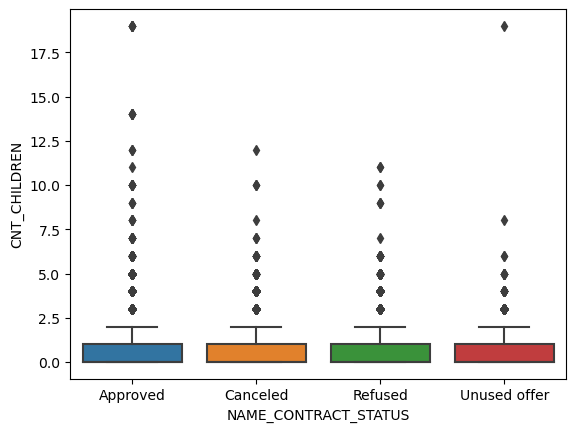

In [22]:
sns.boxplot(x='NAME_CONTRACT_STATUS', y='CNT_CHILDREN', data=merged_df)

In [23]:
merged_df1 = merged_df.copy()

In [24]:
merged_df1.drop('CNT_CHILDREN', axis=1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,1038818,Consumer loans,179055.0,179055.0,XAP,Approved,XNA,New
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,2.0,1,1,0,0,0,0,0,0,School,1810518,Cash loans,900000.0,900000.0,XNA,Approved,XNA,Repeater
2,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,2.0,1,1,0,0,0,0,0,0,School,2636178,Consumer loans,337500.0,337500.0,XAP,Approved,Cash through the bank,Refreshed
3,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,2.0,1,1,0,0,0,0,0,0,School,2396755,Consumer loans,68809.5,68809.5,XAP,Approved,Cash through the bank,Refreshed
4,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,1.0,2,2,0,0,0,0,0,0,Government,1564014,Consumer loans,24282.0,24282.0,XAP,Approved,Cash through the bank,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,N,N,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-410,2.0,1,1,0,0,0,0,1,1,Business Entity Type 3,2073384,Cash loans,229500.0,229500.0,XNA,Approved,Cash through the bank,Repeater
1413697,456255,0,Cash loans,F,N,N,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-410,2.0,1,1,0,0,0,0,1,1,Business Entity Type 3,1708056,Revolving loans,45000.0,45000.0,XAP,Refused,XNA,Repeater
1413698,456255,0,Cash loans,F,N,N,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-410,2.0,1,1,0,0,0,0,1,1,Business Entity Type 3,1296007,Cash loans,765000.0,765000.0,Repairs,Refused,Cash through the bank,Repeater
1413699,456255,0,Cash loans,F,N,N,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-410,2.0,1,1,0,0,0,0,1,1,Business Entity Type 3,2631384,Cash loans,1170000.0,1170000.0,XNA,Approved,Cash through the bank,Repeater


C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

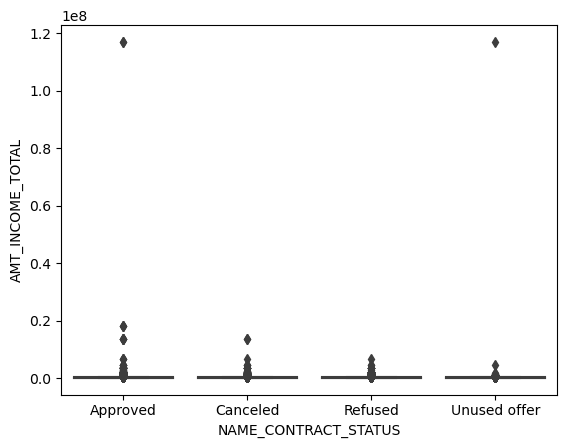

In [25]:
sns.boxplot(x='NAME_CONTRACT_STATUS', y='AMT_INCOME_TOTAL', data=merged_df)

In [26]:
max(merged_df1['AMT_INCOME_TOTAL'])

117000000.0

In [27]:
# Replace values in the 'AMT_INCOME_TOTAL' column of merged_df1 where the original value is greater than 157500 with 157500
merged_df1.loc[merged_df1['AMT_INCOME_TOTAL'] > 252000, 'AMT_INCOME_TOTAL'] = 252000

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_CREDIT'>

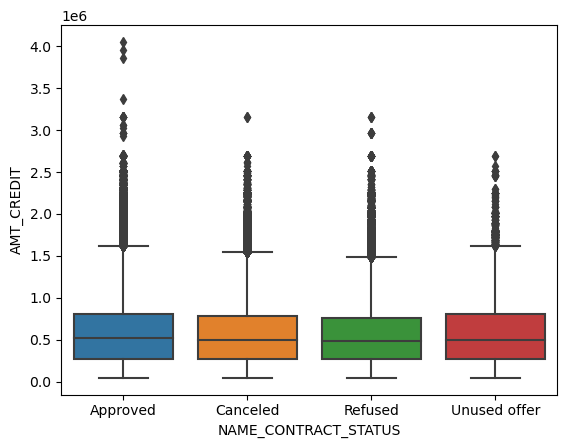

In [28]:
sns.boxplot(x='NAME_CONTRACT_STATUS', y='AMT_CREDIT', data=merged_df)

In [29]:
merged_df1.loc[merged_df1['AMT_CREDIT']>1040000,'AMT_CREDIT']=1040000

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_ANNUITY'>

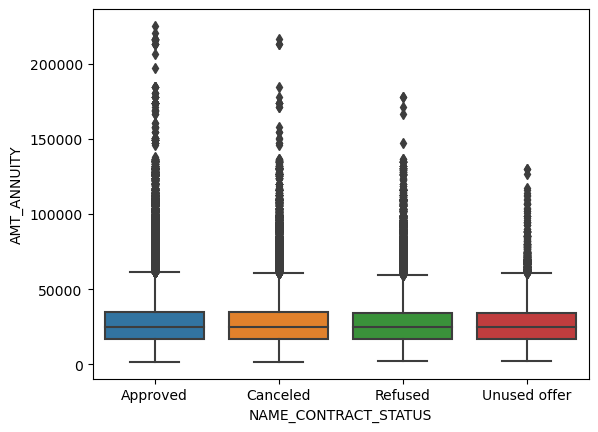

In [30]:
sns.boxplot(x='NAME_CONTRACT_STATUS', y='AMT_ANNUITY', data=merged_df)

In [31]:
merged_df1.loc[merged_df1['AMT_ANNUITY']>52000,'AMT_ANNUITY']=52000

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_GOODS_PRICE_x'>

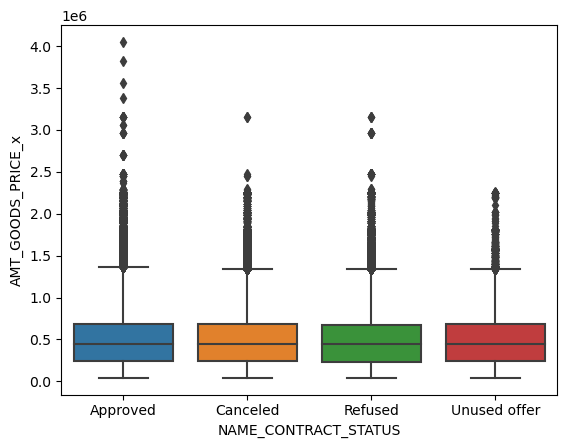

In [32]:
sns.boxplot(x='NAME_CONTRACT_STATUS', y='AMT_GOODS_PRICE_x', data=merged_df)

In [33]:
merged_df1.loc[merged_df1['AMT_GOODS_PRICE_x']>970000,'AMT_GOODS_PRICE_x']=970000

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='REGION_POPULATION_RELATIVE'>

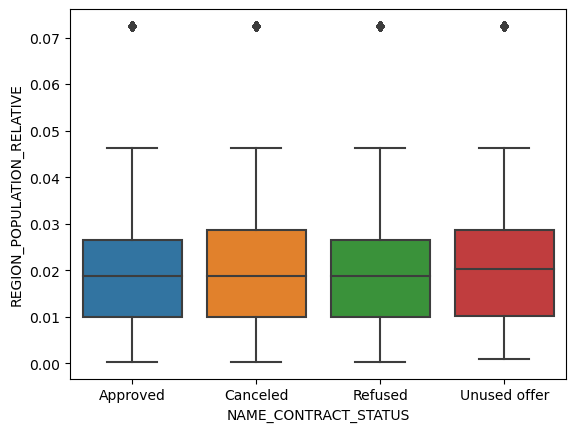

In [34]:
sns.boxplot(x='NAME_CONTRACT_STATUS', y='REGION_POPULATION_RELATIVE', data=merged_df)

In [35]:
merged_df1.loc[merged_df1['REGION_POPULATION_RELATIVE']>0.048, 'REGION_POPULATION_RELATIVE']=0.048

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='DAYS_EMPLOYED'>

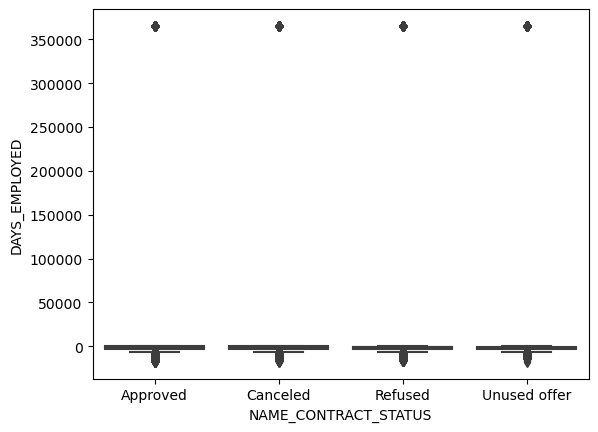

In [36]:
sns.boxplot(x='NAME_CONTRACT_STATUS', y='DAYS_EMPLOYED', data=merged_df)

In [37]:
merged_df1.loc[merged_df1['DAYS_EMPLOYED']>1000,'DAYS_EMPLOYED']=1000

In [38]:
merged_df1.loc[merged_df1['DAYS_EMPLOYED']<-6100,'DAYS_EMPLOYED']=-6100

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='CNT_FAM_MEMBERS'>

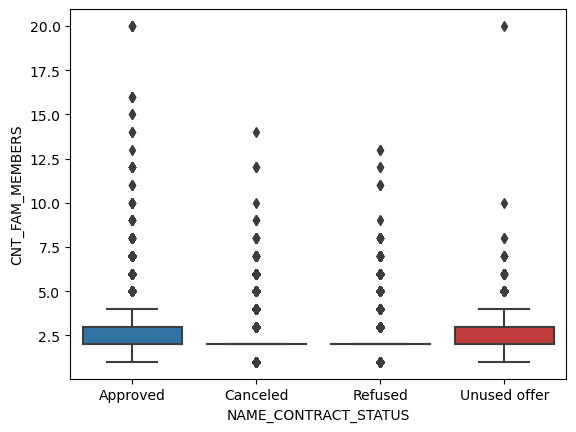

In [39]:
sns.boxplot(x='NAME_CONTRACT_STATUS', y='CNT_FAM_MEMBERS', data=merged_df)

In [40]:
merged_df1.loc[merged_df1['CNT_FAM_MEMBERS']>4,'CNT_FAM_MEMBERS']=4

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_APPLICATION'>

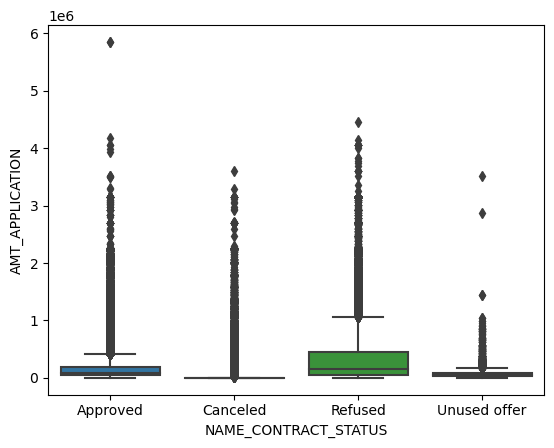

In [41]:
sns.boxplot(x='NAME_CONTRACT_STATUS', y='AMT_APPLICATION', data=merged_df)

In [42]:
merged_df1.loc[merged_df1['AMT_APPLICATION']>500000,'AMT_APPLICATION']=500000

In [43]:
merged_df1.loc[(merged_df1['NAME_CONTRACT_STATUS'] == 'Approved') & (merged_df1['AMT_APPLICATION'] > 410000), 'AMT_APPLICATION'] = 410000

In [44]:
merged_df1.loc[(merged_df1['NAME_CONTRACT_STATUS'] == 'Unused offer') & (merged_df1['AMT_APPLICATION'] > 170000), 'AMT_APPLICATION'] = 170000

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_GOODS_PRICE_y'>

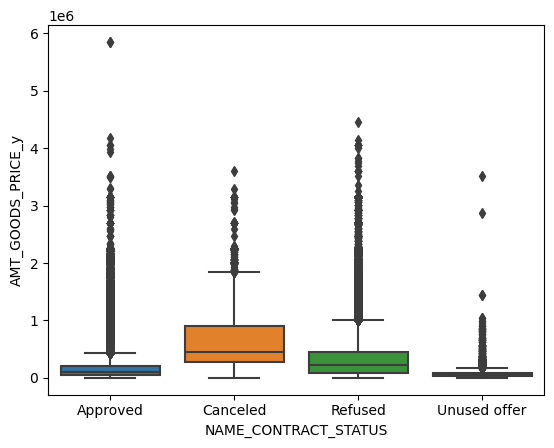

In [45]:
sns.boxplot(x='NAME_CONTRACT_STATUS', y='AMT_GOODS_PRICE_y', data=merged_df)

In [46]:
merged_df1.loc[merged_df1['AMT_GOODS_PRICE_y']>1000000,'AMT_GOODS_PRICE_y']=1000000

In [47]:
merged_df1.loc[(merged_df1['NAME_CONTRACT_STATUS'] == 'Approved') & (merged_df1['AMT_GOODS_PRICE_y'] > 420000), 'AMT_GOODS_PRICE_y'] = 420000

In [48]:
merged_df1.loc[(merged_df1['NAME_CONTRACT_STATUS'] == 'Unused offer') & (merged_df1['AMT_GOODS_PRICE_y'] > 170000), 'AMT_GOODS_PRICE_y'] = 170000

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_GOODS_PRICE_y'>

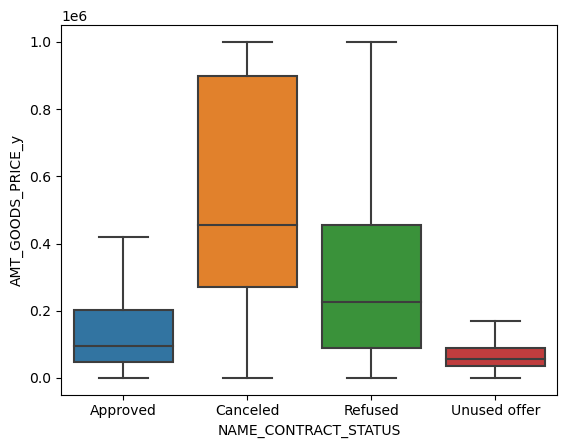

In [49]:
sns.boxplot(x='NAME_CONTRACT_STATUS', y='AMT_GOODS_PRICE_y', data=merged_df1)

In [51]:
merged_df2 = merged_df1.copy()

In [55]:
# Select numerical columns
cat_df = merged_df2.select_dtypes(include=['object'])

cat_df.head()

,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE
0,Cash loans,M,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,Consumer loans,XAP,Approved,XNA,New
1,Cash loans,F,N,N,State servant,Higher education,Married,House / apartment,School,Cash loans,XNA,Approved,XNA,Repeater
2,Cash loans,F,N,N,State servant,Higher education,Married,House / apartment,School,Consumer loans,XAP,Approved,Cash through the bank,Refreshed
3,Cash loans,F,N,N,State servant,Higher education,Married,House / apartment,School,Consumer loans,XAP,Approved,Cash through the bank,Refreshed
4,Revolving loans,M,Y,Y,Working,Secondary / secondary special,Single / not married,House / apartment,Government,Consumer loans,XAP,Approved,Cash through the bank,New


In [57]:
# Select numerical columns
numerical_df = merged_df2.select_dtypes(include=['int', 'float'])

numerical_df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,SK_ID_PREV,AMT_APPLICATION,AMT_GOODS_PRICE_y
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-2120,1.0,2,2,0,0,0,0,0,0,1038818,179055.0,179055.0
1,100003,0,0,252000.0,1040000.0,35698.5,970000.0,0.003541,-16765,-1188,-291,2.0,1,1,0,0,0,0,0,0,1810518,410000.0,420000.0
2,100003,0,0,252000.0,1040000.0,35698.5,970000.0,0.003541,-16765,-1188,-291,2.0,1,1,0,0,0,0,0,0,2636178,337500.0,337500.0
3,100003,0,0,252000.0,1040000.0,35698.5,970000.0,0.003541,-16765,-1188,-291,2.0,1,1,0,0,0,0,0,0,2396755,68809.5,68809.5
4,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-2531,1.0,2,2,0,0,0,0,0,0,1564014,24282.0,24282.0


In [58]:
cat_dtls = pl.from_pandas(cat_df)
dfSummary(cat_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,NAME_CONTRACT_TYPE_x[object],1. Cash loans2. Revolving loans,"1,307,115 (92.5%)106,586 (7.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOElEQVR4nO3bMWrDQBRF0T9BmLiZQQi0GC0ii80iZjdCaIrYuJkUQU0q/TF6xuKeWsUvLgIbvVBrNUAhmNnVzC6vPgRv6VFrve19uBuG4SvG2B95Ec6plLKEEL73BtfFGPtpmm4ppfvRx+E81nX9zDn38zxfzGxfbGZmKaX7OI4/h16HM7p6Hv446grgP2KDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2Q6s78P4V59CN5LSzNdKWXJOffm/BAOKKUsZvbY+zyDFzzDNXgJTPmg0vJmc9UMbNxTPu98C9i4pnwt8y1g0zLl41crmvCnLmSIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQcU35mPzhGe4pn3e+BWwYvEDmFwpbat//eN7vAAAAAElFTkSuQmCC"">",0(0.0%)
2,CODE_GENDER[object],1. F2. M3. XNA,"955,139 (67.6%)458,507 (32.4%)55 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABm0lEQVR4nO3bQU7CUBSF4fOaBmXSpmnSJegeWISLdRFdhHtomr6BIJM6YKg4Qc+zl/9bwU34gZRw0rquAhyq0gfgfiRJe0m70ofgR+d1XY+lj7hV3ff9S9M0XelDcF3OeU4pvW49uLppmu5wOBzbtj2VPgZfLcvyOI5jN03TTtK2Y5Oktm1PwzC8lz4GV+1LH/AbeECADbHBhthgQ2ywITbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2xq6fKfqdKH4HuRXps65zyP49gpyH+mIso5z5LOpe+4FRuEbQixQUhM+eAS6ZMtxLs/sjDrqigLpMhCrKsiLZAii7Su4mn6n+NHXdgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGG2KDDbHBJsS6auv334sw66ooC6TI2CDAhnUVbHhAgA2xwaZKKT2nlHiaw5+rJD1Jeih9COLjaxQ2xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbCpJb5I+Sh+C+FhXwYavUdh8AudFczq/0MVvAAAAAElFTkSuQmCC"">",0(0.0%)
3,FLAG_OWN_CAR[object],1. N2. Y,"937,176 (66.3%)476,525 (33.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOklEQVR4nO3bMWrDQBRF0T9BmLiZQQi0GC8ii80itBshNEVs3EyKFCE4pXhjnu9ZwTe+CGz0UmstAIUUEeeIOPU+BP+6t9auvY84yjBN00fOeex9CB7VWreU0qdLcEPOebxcLtdSyq33Mfi17/v7sizjuq6niPCILSKilHKb5/mr9zF4cO59wJHeeh+A10FskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoPMEPHzol7vQ/CX43cy1Fq3ZVnGMHtRz0GtdYuIe+87jsLg5blZDV4SUz6oOD7ZrJ4GTuymfG7zNydWUz7H+ZsTxykfv6qfFH/qQobYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZqymfy+dwZTflc5u/OWHwAplvCltq31B2yb4AAAAASUVORK5CYII="">",0(0.0%)
4,FLAG_OWN_REALTY[object],1. Y2. N,"1,024,092 (72.4%)389,609 (27.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABPUlEQVR4nO3bQYrCQBRF0V9NEJ1UEQJZTBbhYnsRtZsQUoNWnFQPeuAgIDGDV376nhV88CoY8kKt1QCFYGYXMzu1PgSHPWqtt9ZH7NENw3CNMfatD8ExpZQlhPDtIbguxthP03RLKd1bH4P3rOt6zjn38zyfzOzzYzMzSyndx3H8aX0MDrm0PmCvr9YH4P8gNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBpjP7ewmv9SF4n7fPrSulLDnn3hy9hIenUspiZo/Wd+zB4MU/N4OXwJQPKt5+2dx8i7HlasrnabaGLTdTPm+zNWx5m/Lxj9kxHupChtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhk3Uz4PN+I1V1M+T7M1bDF4gcwvCltq31IReNMAAAAASUVORK5CYII="">",0(0.0%)
5,NAME_INCOME_TYPE[object],1. Working2. Commercial associate3. Pensioner4. State servant5. Unemployed6. Student7. Maternity leave,"724,089 (51.2%)321,481 (22.7%)273,544 (19.3%)94,424 (6.7%)123 (0.0%)24 (0.0%)16 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAChCAYAAADQgM1HAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACyklEQVR4nO3by20bSQBF0WqB8Iw3JAQBCsGTg4JwsA6CQTgHQVAvbI839MIJkKB9i59zIigQF11oot9yOBwGFB5mH4D7ITYyYiMjNjJiI7OMMT6OMT7MPsiV+nk4HL7PPsS12Dw9PX3ebrePsw9yjdZ1fVuW5YvgjrPZbrePLy8v33e73Y/Zh7km7+/v/+73+8fX19cPYwyxHWEzxhi73e7H8/Pzt9mHuUIfZx/gmnhBICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7MZ4/fnMrMPcm38ZqfbrOv6tt/vH4fPZU62ruvbGOPn7HNcC5+Fn8dn4SdYLOKpXNqTzZPihl3U4MWA5LZdzODFgOT2XdrgxRvxDfOnLhmxkREbGbGRERsZsZERGxmxkREbGbG

In [71]:
merged_df2.drop('ORGANIZATION_TYPE', axis=1, inplace=True)
merged_df2.drop('NAME_CASH_LOAN_PURPOSE', axis=1, inplace=True)
merged_df2 = merged_df2.drop(merged_df2[merged_df2['CODE_GENDER'] == 'XNA'].index)

In [72]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1413646 entries, 0 to 1413700
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413646 non-null  int64  
 1   TARGET                       1413646 non-null  int64  
 2   NAME_CONTRACT_TYPE_x         1413646 non-null  object 
 3   CODE_GENDER                  1413646 non-null  object 
 4   FLAG_OWN_CAR                 1413646 non-null  object 
 5   FLAG_OWN_REALTY              1413646 non-null  object 
 6   CNT_CHILDREN                 1413646 non-null  int64  
 7   AMT_INCOME_TOTAL             1413646 non-null  float64
 8   AMT_CREDIT                   1413646 non-null  float64
 9   AMT_ANNUITY                  1413553 non-null  float64
 10  AMT_GOODS_PRICE_x            1412438 non-null  float64
 11  NAME_INCOME_TYPE             1413646 non-null  object 
 12  NAME_EDUCATION_TYPE          1413646 non-null  

In [60]:
num_dtls = pl.from_pandas(numerical_df)
dfSummary(numerical_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,SK_ID_CURR[int64],Mean (sd) : 278481.3 (102811.8)min < med < max:100002.0 < 278992.0 < 456255.0IQR (CV) : 178192.0 (2.7),"291,057 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACmklEQVR4nO3Zu2/aUBiG8e9wScyltgiUbCwdI3VAysLSrWP/2K7dMoDUmaFLJxaEFHERbhCOoVN6WRJ8bAJv9PzmfOGLeQ45Udx+vzfg3JVOvQBwiMqpF0CxnHM1M7vwHN/u9/uHIvcpCqG+Ic65Wrvd/hKGYctnfrVazZ1zX31jPeYhOetQVT8dcu5dMrOd52zYbDa7g8FgFUXRJsvgcrkMhsNh6/7+/sLMMj+3Yx+SF0M94UMPrq6uPkdR1PAZXiwWa+fcNzPL9Ib9w3d3773TNK3Gcfyh2Wz+LJVKSdb5JEmCNE1vLi8v77rd7q+s82ZW85h5chGGYWswGDwc45A8G2qeU1LEQzezm9vb2++dTmeVZXY6nb4bjUafer1ep1wuZw41z+559p5MJq3xePy+3+//uL6+nmda+u98/fHxsZx1tihRFG2OcUhe+kT1PiVFPfQgCJKsP/h8Pq8FQVDv9/ubHK/ttXvevc3MGo2G15v9NP8WHXRH9Tkl5/DQ8762z7xyLGmaVs0sdM75jIe73a5a8Ep/nPUfU3g9cRxXkyT52Ov1yj7Xpaf78WazuTMzn1/9zyJUmJnZdrutFHBdOtr9mFDxn3O9H/MvVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEioHPJFy+UyyPqN1+t1YGYWx3Ewm83qrzmv+tqqe+edP6Sv34zLT8aMtoBNAAAAAElFTkSuQmCC"">",0(0.0%)
2,TARGET[int64],Mean (sd) : 0.1 (0.3)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 0.0 (0.3),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtUlEQVR4nO3XTYqDQBCG4apBRDfdiOBhPEQOm0N4GwntIkog6dnNZpj8dDJkvuF9tlpFL15s9JyzAX/dx7sPANyjuvWCu7dmVhfuP+Wc18JZ4MvVUN297ft+F0LoSpYvy3Jw9z2x4lm3vqh1CKEbx3GNMW6PLE4pNdM0dfM812ZGqHjKzavfzCzGuA3DcCzY3xbMAN/wMwUJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJ1bsPgP/D3VszqwvHTznn9aeHhIqXcPe27/tdCKErmV+W5eDu+59iJVS8Sh1C6MZxXGOM2yODKaVmmqZunufazAgVvy/GuA3DcCwYba895GcKEggVEu66+lNKzaOLU0rN+XyuzCy4+8MHg5xwuVyq0lZuvfMJdyVOfRsPMKsAAAAASUVORK5CYII="">",0(0.0%)
3,CNT_CHILDREN[int64],Mean (sd) : 0.4 (0.7)min < med < max:0.0 < 0.0 < 19.0IQR (CV) : 1.0 (0.6),15 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB2klEQVR4nO3YTWrCUBSG4XNrlKtCgghx5hI6cOgiulgXkcUIQW4wmkbC7ayT0mqi0n70fcY5hzt4yZ+LMRrw17389gGAWyTXLnDOTc1sMnB/G2M8D5wFPv0YqnNuulwu39I0XQxZXlXVwTm3I1bc69oddZKm6WK73Z6zLGv6LA4h+KIoFmVZTsyMUHGXq49+M7Msy5o8z08D9k8HzABf8DEFCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCckzl3ddNzaz1Dk3dEUbYzw/8EgQ9bRQ67oeXy6X1/V6PRqNRs2QHVVVHZxzO2LF00Jt2zbx3s82m02zWq0OfedDCL4oikVZlhMzI9R/7qmPfjOz+Xze5Hl+Gjg+fehhIIuPKUggVEggVEi46R01hOD7Lj4ej97MrK5rv9/vZ33nQwi+67rE7vu9BR3vMcZv/w59AKuZX4nYkvKbAAAAAElFTkSuQmCC"">",0(0.0%)
4,AMT_INCOME_TOTAL[float64],Mean (sd) : 160605.9 (58979.9)min < med < max:25650.0 < 157500.0 < 252000.0IQR (CV) : 94500.0 (2.7),"1,430 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACrUlEQVR4nO3du47aQBSA4TNhQQYUI0QEnV8gUgpKmrxBHjZtuhTwArwBDUJCxghnLYwhTSIlEpf4Msucyf+17Ghd/EL2nLEwl8tFANe9e/YFAP/i5dkXAH8YY7oi0qm4/Hi5XF5vfUioaIQxpjsajb6EYTissn6/38fGmK+3YiVUNKUThuFwNpu9DgaDrMzCJEmC+Xw+3G63HREhVNg3GAyy8Xj8o8LS7r0PCfUGm/dbKI9Qr7B9v4XyCPU6q/dbKI9Q77B1v4Xy2PCHCoQKFQgVKhAqVCBUqECoUMHb7amak6XwfD63m7we1ONlqHUnS3meB0VRfMyy7LuIVNlHRcO8DFVqTJZERFar1XC5XPZOp1PL

In [73]:
cat_df1 = merged_df2.select_dtypes(include=['object'])

cat_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1413646 entries, 0 to 1413700
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   NAME_CONTRACT_TYPE_x  1413646 non-null  object
 1   CODE_GENDER           1413646 non-null  object
 2   FLAG_OWN_CAR          1413646 non-null  object
 3   FLAG_OWN_REALTY       1413646 non-null  object
 4   NAME_INCOME_TYPE      1413646 non-null  object
 5   NAME_EDUCATION_TYPE   1413646 non-null  object
 6   NAME_FAMILY_STATUS    1413646 non-null  object
 7   NAME_HOUSING_TYPE     1413646 non-null  object
 8   NAME_CONTRACT_TYPE_y  1413646 non-null  object
 9   NAME_CONTRACT_STATUS  1413646 non-null  object
 10  NAME_PAYMENT_TYPE     1413646 non-null  object
 11  NAME_CLIENT_TYPE      1413646 non-null  object
dtypes: object(12)
memory usage: 140.2+ MB


In [105]:
data = merged_df2.copy()

In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['NAME_CONTRACT_TYPE_x']=le.fit_transform(data['NAME_CONTRACT_TYPE_x'])
data['CODE_GENDER']=le.fit_transform(data['CODE_GENDER'])
data['FLAG_OWN_CAR']=le.fit_transform(data['FLAG_OWN_CAR'])
data['NAME_INCOME_TYPE']=le.fit_transform(data['NAME_INCOME_TYPE'])
data['NAME_FAMILY_STATUS']=le.fit_transform(data['NAME_FAMILY_STATUS'])
data['NAME_EDUCATION_TYPE']=le.fit_transform(data['NAME_EDUCATION_TYPE'])
data['NAME_HOUSING_TYPE']=le.fit_transform(data['NAME_HOUSING_TYPE'])
data['NAME_CONTRACT_TYPE_y']=le.fit_transform(data['NAME_CONTRACT_TYPE_y'])
data['NAME_CONTRACT_STATUS']=le.fit_transform(data['NAME_CONTRACT_STATUS'])
data['NAME_PAYMENT_TYPE']=le.fit_transform(data['NAME_PAYMENT_TYPE'])
data['NAME_CLIENT_TYPE']=le.fit_transform(data['NAME_CLIENT_TYPE'])

In [107]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_GOODS_PRICE_y,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE
0,100002,1,0,1,0,Y,0,202500.0,406597.5,24700.5,351000.0,6,4,3,1,0.018801,-9461,-637,-2120,1.0,2,2,0,0,0,0,0,0,1038818,1,179055.0,179055.0,0,3,0
1,100003,0,0,0,0,N,0,252000.0,1040000.0,35698.5,970000.0,3,1,1,1,0.003541,-16765,-1188,-291,2.0,1,1,0,0,0,0,0,0,1810518,0,410000.0,420000.0,0,3,2
2,100003,0,0,0,0,N,0,252000.0,1040000.0,35698.5,970000.0,3,1,1,1,0.003541,-16765,-1188,-291,2.0,1,1,0,0,0,0,0,0,2636178,1,337500.0,337500.0,0,0,1
3,100003,0,0,0,0,N,0,252000.0,1040000.0,35698.5,970000.0,3,1,1,1,0.003541,-16765,-1188,-291,2.0,1,1,0,0,0,0,0,0,2396755,1,68809.5,68809.5,0,0,1
4,100004,0,1,1,1,Y,0,67500.0,135000.0,6750.0,135000.0,6,4,3,1,0.010032,-19046,-225,-2531,1.0,2,2,0,0,0,0,0,0,1564014,1,24282.0,24282.0,0,0,0


In [109]:
# data.drop('ORGANIZATION_TYPE', axis=1, inplace=True)

In [111]:
# data.drop('NAME_CASH_LOAN_PURPOSE', axis=1, inplace=True)

In [114]:
data.drop('FLAG_OWN_REALTY', axis=1, inplace=True)

In [115]:
data.drop('SK_ID_PREV', axis=1, inplace=True)

In [116]:
data.drop('SK_ID_CURR', axis=1, inplace=True)

In [120]:
data.drop('AMT_GOODS_PRICE_y', axis=1, inplace=True)

In [121]:
data.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE
0,1,0,1,0,0,202500.0,406597.5,24700.5,351000.0,6,4,3,1,0.018801,-9461,-637,-2120,1.0,2,2,0,0,0,0,0,0,1,179055.0,0,3,0
1,0,0,0,0,0,252000.0,1040000.0,35698.5,970000.0,3,1,1,1,0.003541,-16765,-1188,-291,2.0,1,1,0,0,0,0,0,0,0,410000.0,0,3,2
2,0,0,0,0,0,252000.0,1040000.0,35698.5,970000.0,3,1,1,1,0.003541,-16765,-1188,-291,2.0,1,1,0,0,0,0,0,0,1,337500.0,0,0,1
3,0,0,0,0,0,252000.0,1040000.0,35698.5,970000.0,3,1,1,1,0.003541,-16765,-1188,-291,2.0,1,1,0,0,0,0,0,0,1,68809.5,0,0,1
4,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,4,3,1,0.010032,-19046,-225,-2531,1.0,2,2,0,0,0,0,0,0,1,24282.0,0,0,0


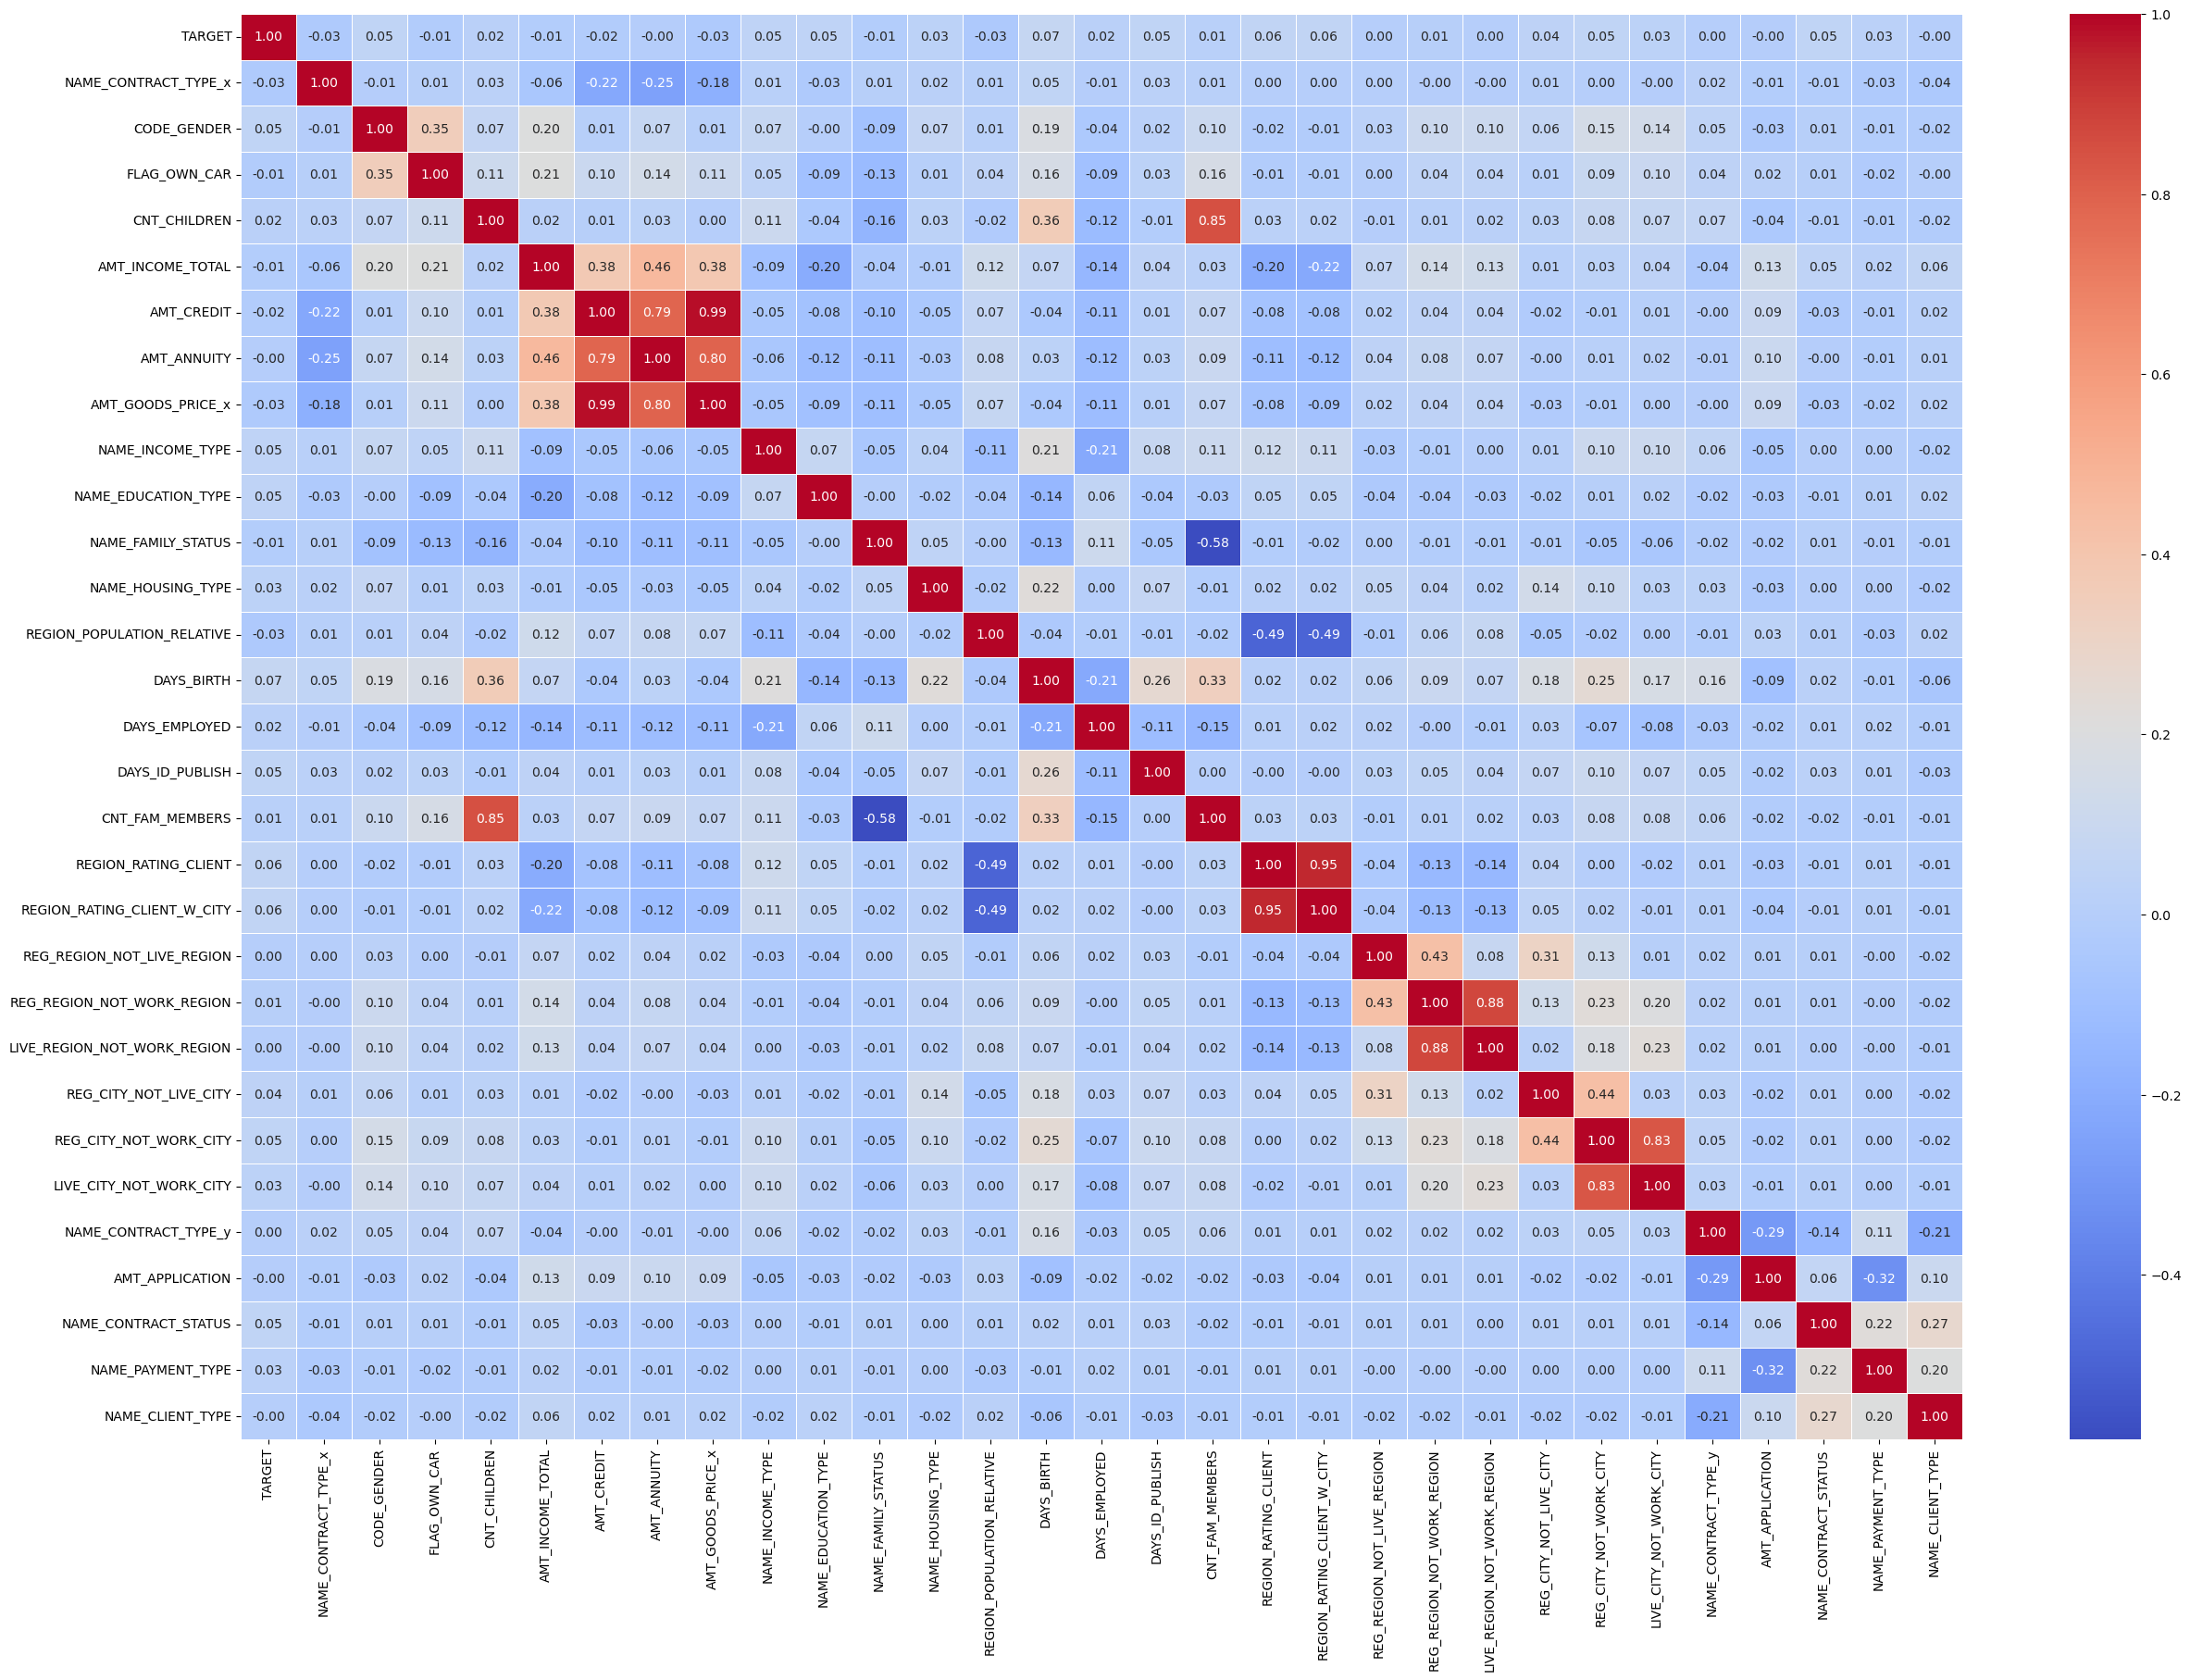

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.show()

In [123]:
# Extract correlations with the 'Class' variable
correlations_with_class = correlation_matrix['NAME_CONTRACT_STATUS'].sort_values(ascending=False)

# Show correlations with the 'Class' variable
print(correlations_with_class)

NAME_CONTRACT_STATUS           1.000000
NAME_CLIENT_TYPE               0.271369
NAME_PAYMENT_TYPE              0.221239
AMT_APPLICATION                0.060983
TARGET                         0.053000
AMT_INCOME_TOTAL               0.045644
DAYS_ID_PUBLISH                0.026649
DAYS_BIRTH                     0.021731
DAYS_EMPLOYED                  0.014757
REG_CITY_NOT_LIVE_CITY         0.013729
REG_CITY_NOT_WORK_CITY         0.013189
REG_REGION_NOT_LIVE_REGION     0.009560
FLAG_OWN_CAR                   0.009385
CODE_GENDER                    0.008832
REG_REGION_NOT_WORK_REGION     0.007551
LIVE_CITY_NOT_WORK_CITY        0.006179
NAME_FAMILY_STATUS             0.005803
REGION_POPULATION_RELATIVE     0.005264
NAME_HOUSING_TYPE              0.003425
LIVE_REGION_NOT_WORK_REGION    0.002904
NAME_INCOME_TYPE               0.002845
AMT_ANNUITY                   -0.002089
REGION_RATING_CLIENT_W_CITY   -0.006195
REGION_RATING_CLIENT          -0.008064
NAME_EDUCATION_TYPE           -0.010695


In [125]:
data1 = data[['NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PAYMENT_TYPE','AMT_APPLICATION','TARGET','AMT_INCOME_TOTAL','NAME_CONTRACT_TYPE_y']]

In [126]:
data1.describe()

,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PAYMENT_TYPE,AMT_APPLICATION,TARGET,AMT_INCOME_TOTAL,NAME_CONTRACT_TYPE_y
count,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06
mean,5.789830e-01,1.552607e+00,1.120475e+00,1.289227e+05,8.655632e-02,1.606046e+05,6.712317e-01
std,8.291851e-01,7.852378e-01,1.447268e+00,1.463206e+05,2.811839e-01,5.897993e+04,6.710348e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.565000e+04,0.000000e+00
25%,0.000000e+00,1.000000e+00,0.000000e+00,1.975050e+04,0.000000e+00,1.125000e+05,0.000000e+00
50%,0.000000e+00,2.000000e+00,0.000000e+00,7.087050e+04,0.000000e+00,1.575000e+05,1.000000e+00
75%,1.000000e+00,2.000000e+00,3.000000e+00,1.800000e+05,0.000000e+00,2.070000e+05,1.000000e+00
max,3.000000e+00,3.000000e+00,3.000000e+00,5.000000e+05,1.000000e+00,2.520000e+05,3.000000e+00


In [128]:
data1.head()

,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PAYMENT_TYPE,AMT_APPLICATION,TARGET,AMT_INCOME_TOTAL,NAME_CONTRACT_TYPE_y
0,0,0,3,179055.0,1,202500.0,1
1,0,2,3,410000.0,0,252000.0,0
2,0,1,0,337500.0,0,252000.0,1
3,0,1,0,68809.5,0,252000.0,1
4,0,0,0,24282.0,0,67500.0,1


In [130]:
df_scaled = data1.copy()
df_scaled

,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PAYMENT_TYPE,AMT_APPLICATION,TARGET,AMT_INCOME_TOTAL,NAME_CONTRACT_TYPE_y
0,0,0,3,179055.0,1,202500.0,1
1,0,2,3,410000.0,0,252000.0,0
2,0,1,0,337500.0,0,252000.0,1
3,0,1,0,68809.5,0,252000.0,1
4,0,0,0,24282.0,0,67500.0,1
...,...,...,...,...,...,...,...
1413696,0,2,0,229500.0,0,157500.0,0
1413697,2,2,3,45000.0,0,157500.0,2
1413698,2,2,0,500000.0,0,157500.0,0
1413699,0,2,0,410000.0,0,157500.0,0


In [131]:
x = df_scaled.drop("NAME_CONTRACT_STATUS", axis=1)
y = df_scaled["NAME_CONTRACT_STATUS"]

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=30)

# Fit Transform

In [133]:
from sklearn.preprocessing import StandardScaler

# Assuming x_train and y_train are your training features and labels
# Assuming x_test and y_test are your test features and labels

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data using the fitted scaler
x_test_scaled = scaler.transform(x_test)

# Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
logistic_model = LogisticRegression()

# Train the model on the scaled training data
logistic_model.fit(x_train_scaled, y_train)

# Make predictions on the scaled test data
predictions = logistic_model.predict(x_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, predictions, average='macro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions, average='macro')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions, average='macro')
print("F1 Score:", f1)

Accuracy: 0.7584515261910657
Precision: 0.5084217870911005


C:\Users\safyc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.4640721091229087
F1 Score: 0.4498066901897617


# Logistic Regression Hyper parameter tuning

In [138]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization type
}

# Create a logistic regression model
logistic_model = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator (model)
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
predictions = best_model.predict(x_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

C:\Users\safyc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\safyc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\safyc\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\safyc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _

Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy: 0.7586885013970927


# Decision Tree

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a decision tree classifier
decision_tree = DecisionTreeClassifier()

# Train the model on the scaled training data
decision_tree.fit(x_train_scaled, y_train)

# Make predictions on the scaled test data
predictions = decision_tree.predict(x_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, predictions, average='macro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions, average='macro')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions, average='macro')
print("F1 Score:", f1)


Accuracy: 0.8059774343012769
Precision: 0.6218362019227627
Recall: 0.5678626558832074
F1 Score: 0.5849091167138675
